In [1]:
'''
작성자 : 한양대학교 컴퓨터공학과 정보보호연구실 석사과정 이석원
학 번 : 2019101059
'''

#사용할 Package를 Import
#numpy, pandas, matplotlib, seaborn, folium 등
#folium은 별도의 설치가 필요
#Anaconda Promppt에서 conda install -c conda-forge folium
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
from folium.plugins import HeatMap

In [2]:
#실제 data를 읽어들여 dataframe 생성
data = pd.read_csv('crime.csv')

In [3]:
#head를 통해 dataframe의 대략적인 구조를 확인
data.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,6/15/2016 11:31:00 PM,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,0
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,NaN,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,1,0
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,NaN,6/23/2017 4:09:00 PM,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1,0


In [4]:
#dataframe의 대략적인 정보를 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526100 entries, 0 to 526099
Data columns (total 19 columns):
INCIDENT_ID               526100 non-null int64
OFFENSE_ID                526100 non-null int64
OFFENSE_CODE              526100 non-null int64
OFFENSE_CODE_EXTENSION    526100 non-null int64
OFFENSE_TYPE_ID           526100 non-null object
OFFENSE_CATEGORY_ID       526100 non-null object
FIRST_OCCURRENCE_DATE     526100 non-null object
LAST_OCCURRENCE_DATE      166714 non-null object
REPORTED_DATE             526100 non-null object
INCIDENT_ADDRESS          474737 non-null object
GEO_X                     521724 non-null float64
GEO_Y                     521724 non-null float64
GEO_LON                   521724 non-null float64
GEO_LAT                   521724 non-null float64
DISTRICT_ID               526100 non-null int64
PRECINCT_ID               526100 non-null int64
NEIGHBORHOOD_ID           526100 non-null object
IS_CRIME                  526100 non-null int64
IS_TRAFFIC

In [5]:
#dataframe에 null값이 얼마나 있는지 확인
data.isnull().sum()

INCIDENT_ID                    0
OFFENSE_ID                     0
OFFENSE_CODE                   0
OFFENSE_CODE_EXTENSION         0
OFFENSE_TYPE_ID                0
OFFENSE_CATEGORY_ID            0
FIRST_OCCURRENCE_DATE          0
LAST_OCCURRENCE_DATE      359386
REPORTED_DATE                  0
INCIDENT_ADDRESS           51363
GEO_X                       4376
GEO_Y                       4376
GEO_LON                     4376
GEO_LAT                     4376
DISTRICT_ID                    0
PRECINCT_ID                    0
NEIGHBORHOOD_ID                0
IS_CRIME                       0
IS_TRAFFIC                     0
dtype: int64

In [6]:
#사용하지 않을 column들을 제거
data.drop(['LAST_OCCURRENCE_DATE', 'GEO_X', 'GEO_Y'], axis=1, inplace=True)

In [7]:
#offense code data를 읽어들여 dataframe을 생성
data_codes = pd.read_csv('offense_codes.csv')

In [8]:
#head를 통해 대략적인 offense code dataframe의 구조를 확인
data_codes.head()

,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_ID,OFFENSE_CATEGORY_NAME,IS_CRIME,IS_TRAFFIC
0,2804,1,stolen-property-possession,Possession of stolen property,all-other-crimes,All Other Crimes,1,0
1,2804,2,fraud-possess-financial-device,Possession of a financial device,all-other-crimes,All Other Crimes,1,0
2,2901,0,damaged-prop-bus,Damaged business property,public-disorder,Public Disorder,1,0
3,2902,0,criminal-mischief-private,Criminal mischief to private property,public-disorder,Public Disorder,1,0
4,2903,0,criminal-mischief-public,Criminal mischief to public property,public-disorder,Public Disorder,1,0


In [9]:
#offense code dataframe의 대략적인 정보 확인
data_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 8 columns):
OFFENSE_CODE              299 non-null int64
OFFENSE_CODE_EXTENSION    299 non-null int64
OFFENSE_TYPE_ID           299 non-null object
OFFENSE_TYPE_NAME         299 non-null object
OFFENSE_CATEGORY_ID       299 non-null object
OFFENSE_CATEGORY_NAME     299 non-null object
IS_CRIME                  299 non-null int64
IS_TRAFFIC                299 non-null int64
dtypes: int64(4), object(4)
memory usage: 18.8+ KB


In [10]:
#offense code dataframe에서 null 값이 얼마나 있는지 확인
data_codes.isnull().sum()

OFFENSE_CODE              0
OFFENSE_CODE_EXTENSION    0
OFFENSE_TYPE_ID           0
OFFENSE_TYPE_NAME         0
OFFENSE_CATEGORY_ID       0
OFFENSE_CATEGORY_NAME     0
IS_CRIME                  0
IS_TRAFFIC                0
dtype: int64

In [11]:
#읽어들인 offense code와 dataframe를 merge
#기준 column은 OFFENSE_CODE와 OFFENSE_CODE_EXTENSION으로 지정
data_temp = data.merge(right=data_codes, how='left', left_on = ['OFFENSE_CODE', 'OFFENSE_CODE_EXTENSION'], right_on=['OFFENSE_CODE', 'OFFENSE_CODE_EXTENSION'])

#merge된 dataframe의 대략적인 구조를 확인
data_temp.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID_x,OFFENSE_CATEGORY_ID_x,FIRST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_LON,...,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME_x,IS_TRAFFIC_x,OFFENSE_TYPE_ID_y,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_ID_y,OFFENSE_CATEGORY_NAME,IS_CRIME_y,IS_TRAFFIC_y
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,6/15/2016 11:31:00 PM,NaN,-104.809881,...,521,montbello,1,0,weapon-unlawful-discharge-of,Unlawful discharge of a weapon,all-other-crimes,All Other Crimes,1,0
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,1/29/2018 5:53:00 PM,NaN,-104.781434,...,522,gateway-green-valley-ranch,1,0,theft-other,Theft - other,larceny,Larceny,1,0
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,-104.957381,...,314,wellshire,1,0,theft-items-from-vehicle,Theft of items from a vehicle,theft-from-motor-vehicle,Theft from Motor Vehicle,1,0
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,-104.941440,...,312,belcaro,1,0,theft-other,Theft - other,larceny,Larceny,1,0
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,6/23/2017 4:09:00 PM,2810 E 1ST AVE,-104.955370,...,311,cherry-creek,1,0,theft-shoplift,Shoplifting,larceny,Larceny,1,0


In [12]:
#dataframe이 올바르게 merge되었는지 검증하는 과정
#OFFENSE_TYPE_ID_x와 OFFENSE_TYPE_y의 column 값이 모두 동일한지 확인
(data_temp['OFFENSE_TYPE_ID_x'] == data_temp['OFFENSE_TYPE_ID_y']).all()

True

In [13]:
#OFFENSE_CATEGORY_ID_x와 OFFENSE_CATEGORY_y의 column 값이 모두 동일한지 확인
(data_temp['OFFENSE_CATEGORY_ID_x'] == data_temp['OFFENSE_CATEGORY_ID_y']).all()

True

In [14]:
#IS_CRIME_x와 IS_CRIME_y의 column 값이 모두 동일한지 확인
(data_temp['IS_CRIME_x'] == data_temp['IS_CRIME_y']).all()

True

In [15]:
#IS_TRAFFIC_x와 IS_TRAFFIC_y의 column 값이 모두 동일한지 확인
(data_temp['IS_TRAFFIC_x'] == data_temp['IS_TRAFFIC_y']).all()

True

In [16]:
#data merge가 제대로 됐음을 확인하고 중복되는 column을 제거
data = data_temp.loc[:, ~data_temp.columns.str.endswith('_y')]
#중복 column이 삭제되었는지 구조를 확인
data.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID_x,OFFENSE_CATEGORY_ID_x,FIRST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME_x,IS_TRAFFIC_x,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_NAME
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,6/15/2016 11:31:00 PM,NaN,-104.809881,39.773188,5,521,montbello,1,0,Unlawful discharge of a weapon,All Other Crimes
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,1/29/2018 5:53:00 PM,NaN,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0,Theft - other,Larceny
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,-104.957381,39.663490,3,314,wellshire,1,0,Theft of items from a vehicle,Theft from Motor Vehicle
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,-104.941440,39.702698,3,312,belcaro,1,0,Theft - other,Larceny
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,6/23/2017 4:09:00 PM,2810 E 1ST AVE,-104.955370,39.717107,3,311,cherry-creek,1,0,Shoplifting,Larceny


In [17]:
#원래 column 이름으로 바꾸기 위해 '_x'를 제거
data.columns = data.columns.str.replace('_x', '')
data.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_NAME
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,6/15/2016 11:31:00 PM,NaN,-104.809881,39.773188,5,521,montbello,1,0,Unlawful discharge of a weapon,All Other Crimes
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,1/29/2018 5:53:00 PM,NaN,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0,Theft - other,Larceny
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,-104.957381,39.663490,3,314,wellshire,1,0,Theft of items from a vehicle,Theft from Motor Vehicle
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,-104.941440,39.702698,3,312,belcaro,1,0,Theft - other,Larceny
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,6/23/2017 4:09:00 PM,2810 E 1ST AVE,-104.955370,39.717107,3,311,cherry-creek,1,0,Shoplifting,Larceny


In [18]:
#사용하지 않을 column을 제거
data.drop(['OFFENSE_CODE', 'OFFENSE_CODE_EXTENSION'], axis=1, inplace=True)

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [19]:
#제거 후의 dataframe 구조를 확인
data.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_NAME
0,2016376978,2016376978521300,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,6/15/2016 11:31:00 PM,NaN,-104.809881,39.773188,5,521,montbello,1,0,Unlawful discharge of a weapon,All Other Crimes
1,20186000994,20186000994239900,theft-other,larceny,10/11/2017 12:30:00 PM,1/29/2018 5:53:00 PM,NaN,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0,Theft - other,Larceny
2,20166003953,20166003953230500,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,-104.957381,39.663490,3,314,wellshire,1,0,Theft of items from a vehicle,Theft from Motor Vehicle
3,201872333,201872333239900,theft-other,larceny,1/30/2018 7:20:00 PM,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,-104.941440,39.702698,3,312,belcaro,1,0,Theft - other,Larceny
4,2017411405,2017411405230300,theft-shoplift,larceny,6/22/2017 8:53:00 PM,6/23/2017 4:09:00 PM,2810 E 1ST AVE,-104.955370,39.717107,3,311,cherry-creek,1,0,Shoplifting,Larceny


In [20]:
#현재 dataframe의 null값이 얼마나 있는지 확인
data.isnull().sum()

INCIDENT_ID                  0
OFFENSE_ID                   0
OFFENSE_TYPE_ID              0
OFFENSE_CATEGORY_ID          0
FIRST_OCCURRENCE_DATE        0
REPORTED_DATE                0
INCIDENT_ADDRESS         51363
GEO_LON                   4376
GEO_LAT                   4376
DISTRICT_ID                  0
PRECINCT_ID                  0
NEIGHBORHOOD_ID              0
IS_CRIME                     0
IS_TRAFFIC                   0
OFFENSE_TYPE_NAME            0
OFFENSE_CATEGORY_NAME        0
dtype: int64

In [21]:
#NaN과 같이 계측되지 않은 값을 가진 row를 제거
data.dropna(axis=0, inplace=True)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
#제거 후 dataframe의 null값 존재 확인
data.isnull().sum()

INCIDENT_ID              0
OFFENSE_ID               0
OFFENSE_TYPE_ID          0
OFFENSE_CATEGORY_ID      0
FIRST_OCCURRENCE_DATE    0
REPORTED_DATE            0
INCIDENT_ADDRESS         0
GEO_LON                  0
GEO_LAT                  0
DISTRICT_ID              0
PRECINCT_ID              0
NEIGHBORHOOD_ID          0
IS_CRIME                 0
IS_TRAFFIC               0
OFFENSE_TYPE_NAME        0
OFFENSE_CATEGORY_NAME    0
dtype: int64

In [23]:
#좌표와 관련된 Column값을 확인
data[['GEO_LON', 'GEO_LAT']].sort_values(by=['GEO_LON', 'GEO_LAT'],ascending = [False,True])

,GEO_LON,GEO_LAT
2441,-0.000002,0.000001
3181,-0.000002,0.000001
8596,-0.000002,0.000001
10047,-0.000002,0.000001
10422,-0.000002,0.000001
10710,-0.000002,0.000001
11464,-0.000002,0.000001
11645,-0.000002,0.000001
20012,-0.000002,0.000001
20218,-0.000002,0.000001


In [24]:
#실제 data를 확인하면 GEO_LON = -0.0000024와 -0.0000013, GEO_LAT = 0.0000012 같은 값이 존재함
#이와 같은 값들은 처리할 수 없는 의미없는 값들이므로 다음과 같은 값을 가진 row의 갯수를 확인
(data['GEO_LON'] == -0.0000024).sum()

134

In [25]:
(data['GEO_LON'] == -0.0000013).sum()

0

In [26]:
(data['GEO_LAT'] == 0.0000012).sum()

134

In [27]:
#실제 데이터에서도 GEO_LON = -0.0000024일 때, GEO_LAT = 0.0000012을 가진 row가 총 134개가 확인됨
#이에 따라 dataframe을 해당 값을 제외하여 다시 지정함
data = data[data.GEO_LON != -0.0000024]

In [28]:
#의미없는 Data가 제대로 제거되었는지 검증
(data['GEO_LON'] == -0.0000024).sum()

0

In [29]:
(data['GEO_LAT'] == 0.0000012).sum()

0

In [30]:
#시간 format을 처리할 수 있도록 datetime으로 변경
data['FIRST_OCCURRENCE_DATE'] = pd.to_datetime(data['FIRST_OCCURRENCE_DATE'], infer_datetime_format=True)
data['REPORTED_DATE'] = pd.to_datetime(data['REPORTED_DATE'], infer_datetime_format=True)

In [31]:
#data format이 바뀌었는지 확인
data.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_NAME
2,20166003953,20166003953230500,theft-items-from-vehicle,theft-from-motor-vehicle,2016-03-04 20:00:00,2016-04-26 21:02:00,2932 S JOSEPHINE ST,-104.957381,39.663490,3,314,wellshire,1,0,Theft of items from a vehicle,Theft from Motor Vehicle
3,201872333,201872333239900,theft-other,larceny,2018-01-30 19:20:00,2018-01-30 22:29:00,705 S COLORADO BLVD,-104.941440,39.702698,3,312,belcaro,1,0,Theft - other,Larceny
4,2017411405,2017411405230300,theft-shoplift,larceny,2017-06-22 20:53:00,2017-06-23 16:09:00,2810 E 1ST AVE,-104.955370,39.717107,3,311,cherry-creek,1,0,Shoplifting,Larceny
5,201872837,201872837549900,traf-other,all-other-crimes,2018-01-31 00:44:00,2018-01-31 01:29:00,2100 BLOCK E 17TH AVE,-104.961928,39.743149,6,622,city-park-west,1,0,Traffic offense - other,All Other Crimes
6,20186001015,20186001015230400,theft-parts-from-vehicle,theft-from-motor-vehicle,2017-06-01 12:15:00,2018-01-26 12:24:00,995 N FEDERAL BLVD,-105.025543,39.732790,1,122,villa-park,1,0,Theft of parts from a vehicle,Theft from Motor Vehicle


In [32]:
#불필요한 data의 정리를 모두 마쳤으며 최종적으로 남은 data를 확인
#Pre-process 완료
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474603 entries, 2 to 526099
Data columns (total 16 columns):
INCIDENT_ID              474603 non-null int64
OFFENSE_ID               474603 non-null int64
OFFENSE_TYPE_ID          474603 non-null object
OFFENSE_CATEGORY_ID      474603 non-null object
FIRST_OCCURRENCE_DATE    474603 non-null datetime64[ns]
REPORTED_DATE            474603 non-null datetime64[ns]
INCIDENT_ADDRESS         474603 non-null object
GEO_LON                  474603 non-null float64
GEO_LAT                  474603 non-null float64
DISTRICT_ID              474603 non-null int64
PRECINCT_ID              474603 non-null int64
NEIGHBORHOOD_ID          474603 non-null object
IS_CRIME                 474603 non-null int64
IS_TRAFFIC               474603 non-null int64
OFFENSE_TYPE_NAME        474603 non-null object
OFFENSE_CATEGORY_NAME    474603 non-null object
dtypes: datetime64[ns](2), float64(2), int64(6), object(6)
memory usage: 61.6+ MB


In [33]:
#최초 사건 발생의 가장 과거에 발생한 값을 확인
min(data['FIRST_OCCURRENCE_DATE'])

Timestamp('2014-01-02 00:00:00')

In [34]:
#최초 사건 발생의 가장 최근에 발생한 값을 확인
max(data['FIRST_OCCURRENCE_DATE'])

Timestamp('2019-11-05 06:30:00')

In [35]:
#OFFENSE_CATEGORY_NAME에 따라 data grouping
data.groupby('OFFENSE_CATEGORY_NAME').agg({'INCIDENT_ID':'count'}).sort_values(by='INCIDENT_ID',ascending=False)

,INCIDENT_ID
OFFENSE_CATEGORY_NAME,
Traffic Accident,120678
All Other Crimes,88532
Larceny,50664
Public Disorder,47068
Theft from Motor Vehicle,39585
Drug & Alcohol,32091
Auto Theft,27007
Burglary,24608
Other Crimes Against Persons,20615


In [36]:
#OFFENSE_CATEGORY_NAME 중에서 Traffic Accident와 관련된 세부 항목 grouping
data[data['OFFENSE_CATEGORY_NAME']=='Traffic Accident'].groupby('OFFENSE_TYPE_NAME').agg({'INCIDENT_ID':'count'}).sort_values(by='INCIDENT_ID',ascending=False)

,INCIDENT_ID
OFFENSE_TYPE_NAME,
Traffic accident,82624
Traffic accident - hit and run,34337
Traffic accident - DUI-DUID,3717


In [37]:
#OFFENSE_CATEGORY_NAME에 따른 전체 세부항목 조회
data.groupby(['OFFENSE_CATEGORY_NAME','OFFENSE_TYPE_NAME']).agg({'INCIDENT_ID':'count'}).groupby(['OFFENSE_CATEGORY_NAME']).head().sort_values(by=['OFFENSE_CATEGORY_NAME','INCIDENT_ID'],ascending = [True,False])

INCIDENT_ID
OFFENSE_CATEGORY_NAME        OFFENSE_TYPE_NAME                                              
Aggravated Assault           Assault causing serious bodily injury                      4905
                             Threatening to imminently injure with a weapon             2735
                             Assault causing serious bodily injury - domesti...         1965
                             Weapon fired into an occupied building                      467
                             Weapon fired into an occupied vehicle                       133
All Other Crimes             Assault causing serious bodily injury of a poli...          292
                             Accessory / conspiracy to crime                             117
                             Altering the serial number                                   21
                             Assault causing serious bodily injury of a poli...            9
                             Aiding the escape of a prisoner                               5
Arson                        Arson of a vehicle                                          182
                             Arson                                                       174
                             Arson of a residence                                        133
                             Arson of a business                                          70
                             Arson to a public building                                   15
Auto Theft                   Motor vehicle theft                                       26400
                             Theft of a trailer                                          559
                             Theft of construction equipment                              48
Burglary                     Burglary of a business with forced entry                   5047
                             Burglary and auto theft at a residence without ...          398
                             Burglary and auto theft at a residence with for...          157
                             Burglary and auto theft at a business with forc...          140
                             Burglary and auto theft at a business without f...           45
Drug & Alcohol               Illegal possession of liquor                               8171
                             Illegal sale of liquor                                      380
                             Cultivation of marijuana                                    217
                             Fraud to obtain drugs                                       167
                             Liquor law violation                                          4
Larceny                      Theft - other                                             20158
                             Shoplifting                                               14047
...                                                                                      ...
                             Pocketpicking                                               182
Murder                       Homicide by other means                                     168
                             Vehicular homicide                                           19
                             Homicide by a family member                                  15
                             Homicide of a Police Officer w/gun                            2
                             Homicide by negligence                                        1
Other Crimes Against Persons Assault causing minor bodily injury                       11785
                             Assault causing minor bodily injury - domestic ...         8128
                             Assault causing minor bodily injury to a police...          701
                             Manufacture of obscene material                               1
Public Disorder              Criminal mischief to a motor vehicle                 

In [38]:
#사건 발생 시간을 입력
data['FIRST_OCCURRENCE_HOUR'] = data['FIRST_OCCURRENCE_DATE'].dt.hour

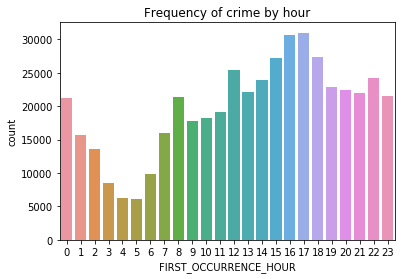

In [39]:
#시간별로 발생한 사건의 빈도를 chart로 생성

sns.countplot(data=data,x='FIRST_OCCURRENCE_HOUR')
plt.title('Frequency of crime by hour')
plt.show()

In [40]:
#15시부터 18시 사이에 발생한 사건들만 grouping
data[data['FIRST_OCCURRENCE_HOUR'].isin([15,16,17,18])].groupby(['FIRST_OCCURRENCE_HOUR','OFFENSE_CATEGORY_NAME']).agg({'INCIDENT_ID':'count'}).groupby(['FIRST_OCCURRENCE_HOUR']).head().sort_values(by=['FIRST_OCCURRENCE_HOUR','INCIDENT_ID'],ascending = [True,False])

INCIDENT_ID
FIRST_OCCURRENCE_HOUR OFFENSE_CATEGORY_NAME             
15                    All Other Crimes              4797
                      Burglary                      1021
                      Auto Theft                     939
                      Aggravated Assault             437
                      Arson                            9
16                    All Other Crimes              5772
                      Burglary                      1183
                      Auto Theft                    1144
                      Aggravated Assault             440
                      Arson                           24
17                    All Other Crimes              4769
                      Burglary                      1720
                      Auto Theft                    1657
                      Aggravated Assault             458
                      Arson                           22
18                    All Other Crimes              4654
                      Auto Theft                    1710
                      Burglary                      1557
                      Aggravated Assault             514
                      Arson                           33

In [41]:
#하루 평균 살인 사건 발생가능성과 심야 살인 사건 발생 가능성 및 심야에 발생하는 살인사건 가능성이 얼마나 더 높은지 확인

murder_ttl_count = data[data['OFFENSE_CATEGORY_NAME']=='Murder']['INCIDENT_ID'].count()
ttl_count = data['INCIDENT_ID'].count()
murder_midnight_count = data[(data['OFFENSE_CATEGORY_NAME']=='Murder')&((data['FIRST_OCCURRENCE_HOUR']>=22)| (data['FIRST_OCCURRENCE_HOUR']<=4))]['INCIDENT_ID'].count()
midnight_count= data[(data['FIRST_OCCURRENCE_HOUR']>=22)| (data['FIRST_OCCURRENCE_HOUR']<=4)]['INCIDENT_ID'].count()

lift = (murder_midnight_count / midnight_count) / (murder_ttl_count/ttl_count)
print("Average probability of having murder during the whole day : {:1.6f}".format((murder_ttl_count/ttl_count)))
print("Probability of having murder during the midnight : {:1.6f}".format((murder_midnight_count / midnight_count)))
print("The lift is : {:1.6f}".format(lift))

Average probability of having murder during the whole day : 0.000432
Probability of having murder during the midnight : 0.000937
The lift is : 2.168649


In [42]:
#살인사건과 관련된 dataframe만 따로 추출
data_murder = data[data['OFFENSE_CATEGORY_NAME']=='Murder']
#살인사건 dataframe에 계측되지 않은 값이 있는지 확인
data_murder.isnull().sum()

INCIDENT_ID              0
OFFENSE_ID               0
OFFENSE_TYPE_ID          0
OFFENSE_CATEGORY_ID      0
FIRST_OCCURRENCE_DATE    0
REPORTED_DATE            0
INCIDENT_ADDRESS         0
GEO_LON                  0
GEO_LAT                  0
DISTRICT_ID              0
PRECINCT_ID              0
NEIGHBORHOOD_ID          0
IS_CRIME                 0
IS_TRAFFIC               0
OFFENSE_TYPE_NAME        0
OFFENSE_CATEGORY_NAME    0
FIRST_OCCURRENCE_HOUR    0
dtype: int64

In [43]:
#살인 사건 dataframe의 위치정보를 대략적으로 확인
data_murder[['GEO_LON','GEO_LAT']].describe()

,GEO_LON,GEO_LAT
count,205.000000,205.000000
mean,-104.959327,39.734491
std,0.063841,0.037781
min,-105.053253,39.628122
25%,-105.001950,39.711207
50%,-104.975646,39.740452
75%,-104.918504,39.762353
max,-104.760165,39.802103


In [44]:
#Heatmap을 통해 지금까지 발생한 살인사건이 빈번하게 일어난 지역을 확인
denver_map = folium.Map(location=[39.7, -104.9],zoom_start =11)
data_loc= data_murder[['GEO_LAT','GEO_LON']].values
data_loc =data_loc.tolist()
hm = plugins.HeatMap(data_loc)
hm.add_to(denver_map)
denver_map

In [45]:
#Clustering을 통해 범죄가 발생하는 주요 지역 선정
#사용하는 알고리즘 : K-means clustering

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances

#clustering할 데이터의 sample 갯수는 45만개
#생성할 cluster의 수는 300개로 함
cls_data=data.sample(450000).copy()
ml = KMeans(n_clusters=300, init='k-means++')
ml.fit(cls_data[['GEO_LON', 'GEO_LAT']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=300, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [46]:
#생성된 cluster의 centroid 값을 생성
cluster = ml.cluster_centers_
cluster[:10]

array([[-105.02340735,   39.66620473],
       [-104.94070334,   39.74034914],
       [-104.86318519,   39.79219821],
       [-104.99836364,   39.73944754],
       [-104.9190199 ,   39.6896394 ],
       [-104.67375677,   39.84988936],
       [-105.03488665,   39.75083535],
       [-104.75801179,   39.77343362],
       [-104.90366733,   39.7399239 ],
       [-105.03204194,   39.71121098]])

In [47]:
#각 Cluster별 발생한 전체 사건
X = data[['GEO_LON', 'GEO_LAT']].values
predictions = ml.fit_predict(X)
kclustered = pd.concat([data.reset_index(), pd.DataFrame({'Cluster':predictions})], axis=1)
kclustered

,index,INCIDENT_ID,OFFENSE_ID,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_NAME,FIRST_OCCURRENCE_HOUR,Cluster
0,2,20166003953,20166003953230500,theft-items-from-vehicle,theft-from-motor-vehicle,2016-03-04 20:00:00,2016-04-26 21:02:00,2932 S JOSEPHINE ST,-104.957381,39.663490,3,314,wellshire,1,0,Theft of items from a vehicle,Theft from Motor Vehicle,20,252
1,3,201872333,201872333239900,theft-other,larceny,2018-01-30 19:20:00,2018-01-30 22:29:00,705 S COLORADO BLVD,-104.941440,39.702698,3,312,belcaro,1,0,Theft - other,Larceny,19,291
2,4,2017411405,2017411405230300,theft-shoplift,larceny,2017-06-22 20:53:00,2017-06-23 16:09:00,2810 E 1ST AVE,-104.955370,39.717107,3,311,cherry-creek,1,0,Shoplifting,Larceny,20,38
3,5,201872837,201872837549900,traf-other,all-other-crimes,2018-01-31 00:44:00,2018-01-31 01:29:00,2100 BLOCK E 17TH AVE,-104.961928,39.743149,6,622,city-park-west,1,0,Traffic offense - other,All Other Crimes,0,278
4,6,20186001015,20186001015230400,theft-parts-from-vehicle,theft-from-motor-vehicle,2017-06-01 12:15:00,2018-01-26 12:24:00,995 N FEDERAL BLVD,-105.025543,39.732790,1,122,villa-park,1,0,Theft of parts from a vehicle,Theft from Motor Vehicle,12,90
5,7,201870628,201870628570700,criminal-trespassing,all-other-crimes,2018-01-30 07:40:00,2018-01-30 10:33:00,E SPEER BLVD / N GRANT ST,-104.983794,39.723424,3,311,speer,1,0,Criminal trespassing,All Other Crimes,7,268
6,8,201870833,201870833540100,traffic-accident-hit-and-run,traffic-accident,2018-01-30 09:10:00,2018-01-30 09:17:00,W 13TH AVE / N CHEROKEE ST,-104.991650,39.736863,6,611,civic-center,0,1,Traffic accident - hit and run,Traffic Accident,9,126
7,9,20186001048,20186001048230500,theft-items-from-vehicle,theft-from-motor-vehicle,2018-01-31 00:55:00,2018-01-31 07:07:00,2828 N ZUNI ST,-105.015451,39.757627,1,113,highland,1,0,Theft of items from a vehicle,Theft from Motor Vehicle,0,179
8,10,201872390,201872390357200,drug-methampetamine-possess,drug-alcohol,2018-01-30 20:04:00,2018-01-30 22:12:00,E EVANS AVE / S GRAPE ST,-104.925197,39.678463,3,323,goldsmith,1,0,Possession of methampetamine,Drug & Alcohol,20,212
9,11,20186001033,20186001033230400,theft-parts-from-vehicle,theft-from-motor-vehicle,2018-01-28 05:25:00,2018-01-30 17:42:00,1220 S INCA ST,-104.997720,39.694578,4,422,ruby-hill,1,0,Theft of parts from a vehicle,Theft from Motor Vehicle,5,95


In [48]:
#index column은 필요하지 않으므로 제거
kclustered.drop('index', axis=1, inplace=True)
kclustered

,INCIDENT_ID,OFFENSE_ID,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,OFFENSE_TYPE_NAME,OFFENSE_CATEGORY_NAME,FIRST_OCCURRENCE_HOUR,Cluster
0,20166003953,20166003953230500,theft-items-from-vehicle,theft-from-motor-vehicle,2016-03-04 20:00:00,2016-04-26 21:02:00,2932 S JOSEPHINE ST,-104.957381,39.663490,3,314,wellshire,1,0,Theft of items from a vehicle,Theft from Motor Vehicle,20,252
1,201872333,201872333239900,theft-other,larceny,2018-01-30 19:20:00,2018-01-30 22:29:00,705 S COLORADO BLVD,-104.941440,39.702698,3,312,belcaro,1,0,Theft - other,Larceny,19,291
2,2017411405,2017411405230300,theft-shoplift,larceny,2017-06-22 20:53:00,2017-06-23 16:09:00,2810 E 1ST AVE,-104.955370,39.717107,3,311,cherry-creek,1,0,Shoplifting,Larceny,20,38
3,201872837,201872837549900,traf-other,all-other-crimes,2018-01-31 00:44:00,2018-01-31 01:29:00,2100 BLOCK E 17TH AVE,-104.961928,39.743149,6,622,city-park-west,1,0,Traffic offense - other,All Other Crimes,0,278
4,20186001015,20186001015230400,theft-parts-from-vehicle,theft-from-motor-vehicle,2017-06-01 12:15:00,2018-01-26 12:24:00,995 N FEDERAL BLVD,-105.025543,39.732790,1,122,villa-park,1,0,Theft of parts from a vehicle,Theft from Motor Vehicle,12,90
5,201870628,201870628570700,criminal-trespassing,all-other-crimes,2018-01-30 07:40:00,2018-01-30 10:33:00,E SPEER BLVD / N GRANT ST,-104.983794,39.723424,3,311,speer,1,0,Criminal trespassing,All Other Crimes,7,268
6,201870833,201870833540100,traffic-accident-hit-and-run,traffic-accident,2018-01-30 09:10:00,2018-01-30 09:17:00,W 13TH AVE / N CHEROKEE ST,-104.991650,39.736863,6,611,civic-center,0,1,Traffic accident - hit and run,Traffic Accident,9,126
7,20186001048,20186001048230500,theft-items-from-vehicle,theft-from-motor-vehicle,2018-01-31 00:55:00,2018-01-31 07:07:00,2828 N ZUNI ST,-105.015451,39.757627,1,113,highland,1,0,Theft of items from a vehicle,Theft from Motor Vehicle,0,179
8,201872390,201872390357200,drug-methampetamine-possess,drug-alcohol,2018-01-30 20:04:00,2018-01-30 22:12:00,E EVANS AVE / S GRAPE ST,-104.925197,39.678463,3,323,goldsmith,1,0,Possession of methampetamine,Drug & Alcohol,20,212
9,20186001033,20186001033230400,theft-parts-from-vehicle,theft-from-motor-vehicle,2018-01-28 05:25:00,2018-01-30 17:42:00,1220 S INCA ST,-104.997720,39.694578,4,422,ruby-hill,1,0,Theft of parts from a vehicle,Theft from Motor Vehicle,5,95


In [49]:
centers = ml.cluster_centers_
kcenters=pd.DataFrame(centers)
kcenters=kcenters.rename(columns={0:'Longitude',1:'Latitude'})
kcenters

,Longitude,Latitude
0,-104.975018,39.769052
1,-104.886550,39.738691
2,-105.040403,39.697945
3,-104.834142,39.794581
4,-104.907563,39.635082
5,-104.986191,39.720556
6,-104.672205,39.834483
7,-105.009614,39.746738
8,-104.958685,39.679290
9,-104.947075,39.737878


In [50]:
kcenters['Total Crimes']=kclustered.groupby('Cluster')['INCIDENT_ID'].count().reset_index()['INCIDENT_ID']
kcenters

,Longitude,Latitude,Total Crimes
0,-104.975018,39.769052,1818
1,-104.886550,39.738691,3711
2,-105.040403,39.697945,926
3,-104.834142,39.794581,881
4,-104.907563,39.635082,1597
5,-104.986191,39.720556,2289
6,-104.672205,39.834483,345
7,-105.009614,39.746738,1285
8,-104.958685,39.679290,1510
9,-104.947075,39.737878,1534


In [51]:
#geopy 패키지를 사용함
#설치되어 있지 않다면 anaconda prompt에서 conda install -c conda-forge geopy
#클러스터링 된 값의 위도와 경도를 통해 실제 주소를 받아옴

from geopy.geocoders import Nominatim
geolocator=Nominatim(timeout=3)

address=[]
for index,row in kcenters.iterrows():
    rev_location=geolocator.reverse(np.array([row.Latitude, row.Longitude]))
    address.append(rev_location.address)
kcenters['Address']=address
kcenters.head()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


,Longitude,Latitude,Total Crimes,Address
0,-104.975018,39.769052,1818,"1498, 36th Street, Five Points, Denver, Denver..."
1,-104.886550,39.738691,3711,"8734, East 14th Avenue, Denver, Denver County,..."
2,-105.040403,39.697945,926,"1037, South Perry Street, Mar Lee, Denver, Den..."
3,-104.834142,39.794581,881,"13192, Maxwell Place, Montebello, Denver, Denv..."
4,-104.907563,39.635082,1597,"I 25, Denver, Denver County, Colorado, 802377,..."


In [52]:
#클러스터링 된 좌표와 주소를 실제 지도에 표시

denver_clustering = folium.Map(location=[39.7, -104.9],zoom_start =11)

for i in range(0,len(kcenters)):
   folium.Circle(
      location=[kcenters.iloc[i]['Latitude'], kcenters.iloc[i]['Longitude']],
       popup = (
        "<b>Location:</b> {loc}</br></br>"
        "<b>Crimes: </b> {crime}<br>"
    ).format(loc=str(kcenters.iloc[i]['Address']), crime=str(kcenters.iloc[i]['Total Crimes'])),
      radius=kcenters.iloc[i]['Total Crimes']/15,
      color='red',
      fill=True,
      fill_color='red',
      fill_opacity=0.5
   ).add_to(denver_clustering)
folium.TileLayer('cartodbpositron').add_to(denver_clustering)
denver_clustering

In [53]:
#Prophet을 이용하여 예측 모델 작성
#OFFENSE_TYPE 중 교통사고 발생 예측 모델
#교통사고의 data의 수가 얼마나 되는지 확인
data[data['OFFENSE_CATEGORY_NAME']=='Traffic Accident']['INCIDENT_ID'].count()

120678

In [54]:
#교통사고와 관련된 dataframe만 따로 추출
data_traffic = data[data['OFFENSE_CATEGORY_NAME']=='Traffic Accident']
#교통사고 dataframe에 계측되지 않은 값이 있는지 확인
data_traffic.isnull().sum()

INCIDENT_ID              0
OFFENSE_ID               0
OFFENSE_TYPE_ID          0
OFFENSE_CATEGORY_ID      0
FIRST_OCCURRENCE_DATE    0
REPORTED_DATE            0
INCIDENT_ADDRESS         0
GEO_LON                  0
GEO_LAT                  0
DISTRICT_ID              0
PRECINCT_ID              0
NEIGHBORHOOD_ID          0
IS_CRIME                 0
IS_TRAFFIC               0
OFFENSE_TYPE_NAME        0
OFFENSE_CATEGORY_NAME    0
FIRST_OCCURRENCE_HOUR    0
dtype: int64

In [55]:
#교통 사고를 발생일자를 토대로 하여 빈도를 확인
traffic_date_group=data_traffic.groupby('FIRST_OCCURRENCE_DATE').size().reset_index(name='Freq')
traffic_date_group

,FIRST_OCCURRENCE_DATE,Freq
0,2014-01-02 01:35:00,1
1,2014-01-02 03:55:00,1
2,2014-01-02 07:25:00,1
3,2014-01-02 07:35:00,1
4,2014-01-02 07:38:00,1
5,2014-01-02 07:50:00,1
6,2014-01-02 08:48:00,1
7,2014-01-02 09:15:00,1
8,2014-01-02 09:20:00,2
9,2014-01-02 09:55:00,1


In [56]:
#시간별이 아닌 일별로 발생하는 빈도를 집계하기 위해 뒤의 시간 부분은 제거
traffic_date_group['FIRST_OCCURRENCE_DATE'] = traffic_date_group['FIRST_OCCURRENCE_DATE'].dt.floor('d')
#제거 후 집계된 값을 grouping
traffic_date_group = traffic_date_group.groupby('FIRST_OCCURRENCE_DATE').sum()

In [57]:
traffic_date_group

,Freq
FIRST_OCCURRENCE_DATE,
2014-01-02,48
2014-01-03,31
2014-01-04,43
2014-01-05,54
2014-01-06,69
2014-01-07,51
2014-01-08,48
2014-01-09,52
2014-01-10,58


In [58]:
#index로 된 발생일자를 다시 column으로 변경
traffic_date_group.reset_index(level=['FIRST_OCCURRENCE_DATE'], inplace = True)
traffic_date_group

,FIRST_OCCURRENCE_DATE,Freq
0,2014-01-02,48
1,2014-01-03,31
2,2014-01-04,43
3,2014-01-05,54
4,2014-01-06,69
5,2014-01-07,51
6,2014-01-08,48
7,2014-01-09,52
8,2014-01-10,58
9,2014-01-11,25


In [59]:
#실제 2019년에 발생한 사건과 예측하는 사건을 비교하기 위해 우선 2019년에 발생한 사건만 확인
traffic_date_group[traffic_date_group.FIRST_OCCURRENCE_DATE > '2018-12-31']

,FIRST_OCCURRENCE_DATE,Freq
1825,2019-01-01,46
1826,2019-01-02,80
1827,2019-01-03,64
1828,2019-01-04,69
1829,2019-01-05,27
1830,2019-01-06,30
1831,2019-01-07,73
1832,2019-01-08,57
1833,2019-01-09,57
1834,2019-01-10,67


In [60]:
#2018년까지만 계측된 dataframe을 별도로 생성
traffic_date_group_2018 = traffic_date_group.drop(traffic_date_group.index[1825:2133])
traffic_date_group_2018

,FIRST_OCCURRENCE_DATE,Freq
0,2014-01-02,48
1,2014-01-03,31
2,2014-01-04,43
3,2014-01-05,54
4,2014-01-06,69
5,2014-01-07,51
6,2014-01-08,48
7,2014-01-09,52
8,2014-01-10,58
9,2014-01-11,25


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 1440x432 with 0 Axes>

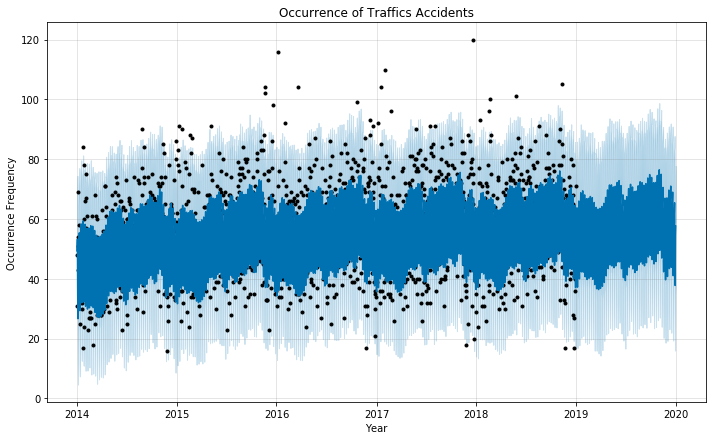

In [67]:
#facebook에서 지원하는 fbprophet 패키지를 사용함
#설치되어 있지 않다면 anaconda prompt에서 conda install -c conda-forge fbprophet
#검은 점은 실제 발생된 사건의 수이며 파란 영역은 평균적인 사건의 발생 수를 흐름으로 표시한 것
#연한 파란색 영역은 약 95% 확률로 해당 영역까지 사건 수의 변동이 있을 수 있는 부분을 나타냄
#2019 ~ 2020 사이는 비어있으며 예측된 결과를 다음과 같이 나타냄

from fbprophet import Prophet

crime_traffic_model_2018 = Prophet(interval_width=0.95)
crime_traffic_data_2018 = traffic_date_group_2018.rename(columns={'FIRST_OCCURRENCE_DATE': 'ds', 'Freq': 'y'})
crime_traffic_model_2018.fit(crime_traffic_data_2018)

crime_traffic_forecast_2018 = crime_traffic_model_2018.make_future_dataframe(periods=365, freq='D')
crime_traffic_forecast_2018 = crime_traffic_model_2018.predict(crime_traffic_forecast_2018)
plt.figure(figsize=(20, 6))
crime_traffic_model_2018.plot(crime_traffic_forecast_2018, xlabel = 'Year', ylabel = 'Occurrence Frequency')
plt.title('Occurrence of Traffics Accidents');

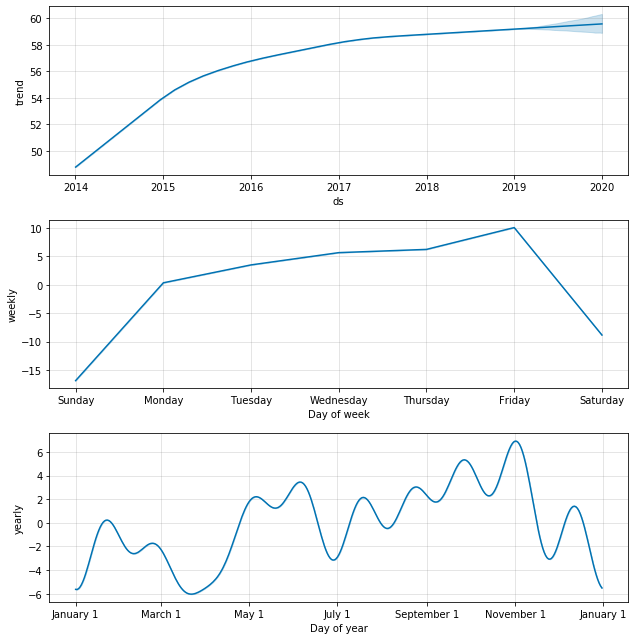

In [62]:
#흐름 또는 주간, 연간 분석 결과를 보여줌
crime_traffic_model_2018.plot_components(crime_traffic_forecast_2018);

In [63]:
#실제 결과 vs 예측된 결과
#2019년부터 2020년 사이의 발생한 교통사고를 예측한 값을 확인
crime_traffic_forecast_2018[crime_traffic_forecast_2018['ds']>='2019-01-01']['yhat'].sum()

21680.102834587327

In [68]:
#bokeh 패키지를 통해 그래프 생성
#해당 graph를 통해서 실제 및 예측한 data를 비교가능
#빨간 영역이 예측되는 사고 발생 횟수 영역
#검은 점은 실제로 사고 발생 횟수를 나타내며 이를 비교하여 예측값과 비교

from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool,ColumnDataSource,RangeTool,LegendItem,Legend
from bokeh.layouts import column
from bokeh.io import output_file,save
from bokeh.layouts import row,gridplot
from numpy import histogram, linspace
from scipy.stats.kde import gaussian_kde

output_notebook()

source_prophet = ColumnDataSource(data=dict(date=crime_traffic_forecast_2018.ds,y=crime_traffic_forecast_2018.yhat))
source_original = ColumnDataSource(data=dict(date=traffic_date_group.FIRST_OCCURRENCE_DATE,y=traffic_date_group.Freq))

prophet_forecast = figure(title='Total Traffic Accident over the years (Predicted value in Red)',width=950, height=450, 
            tools='save,wheel_zoom,pan,reset,box_zoom',x_axis_type='datetime',sizing_mode="scale_width",x_range=(crime_traffic_forecast_2018.ds.min(), crime_traffic_forecast_2018.ds.max()))


prophet_forecast.scatter('date','y',source=source_original,line_width=2,
                         color='black',fill_alpha=0.5,size=2,legend='Actual Crimes')

prophet_forecast.line(crime_traffic_forecast_2018.iloc[0:1825].ds,crime_traffic_forecast_2018.iloc[0:1825].yhat,
                      line_width=2,color='blue',legend='Actual Value Trend')
prophet_forecast.line(crime_traffic_forecast_2018.iloc[-365:].ds,crime_traffic_forecast_2018.iloc[-365:].yhat,
                      line_width=2,color='red',line_alpha=0.3,legend='Predicted Value')
prophet_forecast.line(crime_traffic_forecast_2018.ds,crime_traffic_forecast_2018.yhat_lower,
                      line_width=2,color='lightblue',line_alpha=0.3,legend='95% Confidence Interval')
prophet_forecast.line(crime_traffic_forecast_2018.ds,crime_traffic_forecast_2018.yhat_upper,
                      line_width=2,color='lightblue',line_alpha=0.3)

prophet_forecast.xaxis.axis_label = "Year"
prophet_forecast.yaxis.axis_label = "Occurrence Frequency"
prophet_forecast.xgrid.grid_line_color = None
prophet_forecast.ygrid.grid_line_color = None

prophet_train = figure(title="Date Selection",
                plot_height=100, plot_width=950, y_range=prophet_forecast.y_range,
                x_axis_type="datetime", y_axis_type=None,
                tools="", toolbar_location=None, background_fill_color="#efefef")


range_tool_prophet = RangeTool(x_range=prophet_forecast.x_range)
range_tool_prophet.overlay.fill_color = "navy"
range_tool_prophet.overlay.fill_alpha = 0.2

prophet_train.scatter('date', 'y', source=source_original,size=1)
prophet_train.line('date', 'y', source=source_prophet)


prophet_train.ygrid.grid_line_color = None
prophet_train.add_tools(range_tool_prophet)
prophet_train.toolbar.active_multi = range_tool_prophet

show(column(prophet_forecast,prophet_train))
# output_file("FBProphet_Output.html", title="FBProphet Output")
# save((prophet_forecast,prophet_train))

Loading BokehJS ...

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 1440x432 with 0 Axes>

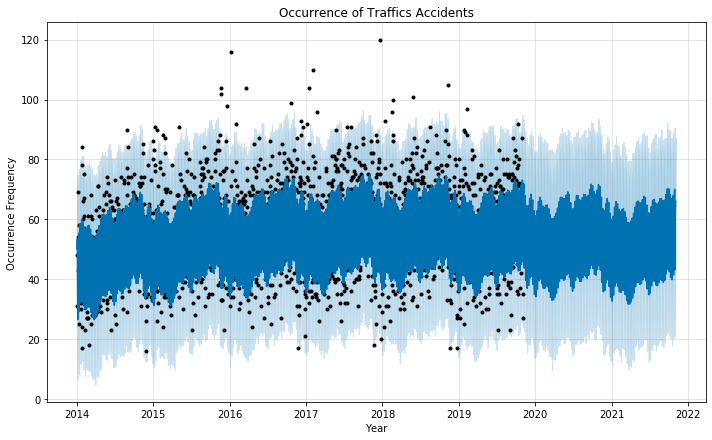

In [69]:
#현재를 기준으로 앞으로 2년간 발생할 사건을 예측하는 경우

crime_traffic_model_2021 = Prophet(interval_width=0.95)
crime_traffic_data_2021 = traffic_date_group.rename(columns={'FIRST_OCCURRENCE_DATE': 'ds', 'Freq': 'y'})
crime_traffic_model_2021.fit(crime_traffic_data_2021)

crime_traffic_forecast_2021 = crime_traffic_model_2021.make_future_dataframe(periods=730, freq='D')
crime_traffic_forecast_2021 = crime_traffic_model_2021.predict(crime_traffic_forecast_2021)
plt.figure(figsize=(20, 6))
crime_traffic_model_2021.plot(crime_traffic_forecast_2021, xlabel = 'Year', ylabel = 'Occurrence Frequency')
plt.title('Occurrence of Traffics Accidents');